<h3>Домашнее задание №6</h3>
<h4>Емельянов Виталий, 293 гр.</h4>

1) Доказать, что дисперсия коэффициента корреляции Спирмэна при верности гипотезы о независимости выборок равна 1/(n-1).

Известно с лекции, что$$\rho_s = \frac{12}{n^3 - n} \sum_{i=1}^{n} ( i - \frac{n+1}{2})(T_i - \frac{n+1}{2})$$

$$\sum_{i=1}^{n}(R_i - R)^2 = \sum_{i=1}^{n} (S_i - S)^2 = \sum_{i=1}^{n} ( i - \frac{n+1}{2})^2 = \frac{n^3 - n}{12}$$ 

Введем обозначения:
$$B = \sum_{i=1}^{n} ( i - \frac{n+1}{2})^2$$
$$C = \sum_{i=1}^{n} ( i - \frac{n+1}{2})(T_i - \frac{n+1}{2})$$
$$\xi_i = R_i - \frac{n+1}{2}$$ 
$$\eta_i = S_i - \frac{n+1}{2}$$

Тогда $B\rho_s = C = \sum_{i=1}^{n} \xi_i \eta_i$<br/>
Возведем в квадрат и получим $$B^2\rho_s^2 = \sum_{i, j} \xi_i \xi_j \eta_i \eta_j$$
Возьмем от этого матожидание
$$B^2 E\rho_s^2 = B^2 (E\rho_s^2 - (E\rho_s)^2) = B^2 D\rho_s$$
В силу справделичвости гипотезы $H_0$ $\xi_i, \eta_i$ - независимы, значит
$$B^2 E\rho_s^2 = \sum_{i, j} E\xi_i \xi_j E\eta_i \eta_j$$
Эта сумма содержит n слагаемых с i=j и все эти слагаемые одинаковы, содержит n(n-1) одинаковых слагаемых с индексами i != j. Поэтому:
$$B^2 E\rho_s^2  = nE\xi_1^2E\eta_1^2 + n(n-1)E\xi_1\xi_2E\eta_1\eta_2$$
Рассмотрим
$$\sum_{i=1}^{n} \xi_i = \frac{n(n+1)}{2} - \frac{n(n+1)}{2} = 0$$
$$ 0 \cdot E\xi_1= E(\xi_1 \sum_{i=1}^{n} \xi_i) = E\xi_1^2 + (n-1)E\xi_1\xi_2$$
Следовательно, $E\xi_1\xi_2 = - \frac{1}{n-1}E\xi_1^2$

 $\sum_{i=1}^{n} \xi_i^2 = B \implies E\xi_1^2 = \frac{B}{n}$
 Поэтому  $$E\xi_1\xi_2 = -\frac{B}{n(n-1)}$$
 
 Тем же путем получаются формулы для $E\eta_1^2, E\eta_1\eta_2$
 
 Значит $$B^2 D\rho_s = \frac{B^2}{n} + \frac{B^2}{n(n-1)}$$
 $$\implies D\rho_s = \frac{n}{n(n-1)} = \frac{1}{n-1}$$

   3) При помощи однофакторного дисперсионного анализа проверить наличие различий между 4 выборками в файле W06_026_1.csv.

Выберем уровень значимости гипотезы $\alpha = 0.05$. Воспользуемся критерием Краскера-Уоллеса

W =  1.98291989205
pvalue =  0.57595930269


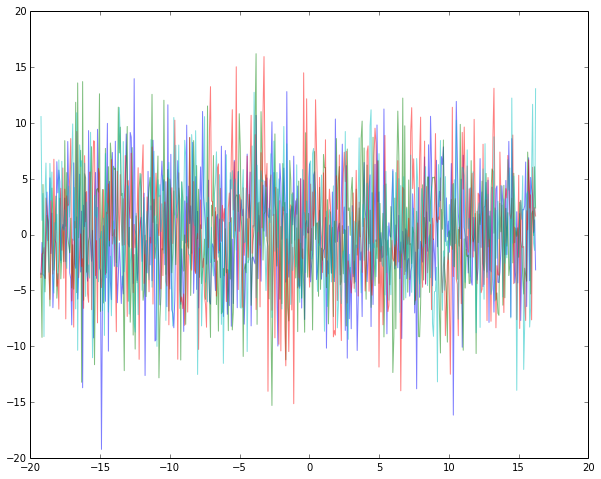

In [300]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
%matplotlib inline

data = np.genfromtxt('W06_026_1.csv', delimiter=',')
X = np.matrix(data)
t = np.linspace(X.min(), X.max(), 500)
plt.figure(figsize=(10, 8))

plt.plot(t, X[:,0], alpha=0.5)
plt.plot(t, X[:,1], alpha=0.5)
plt.plot(t, X[:,2], alpha=0.5)
plt.plot(t, X[:,3], alpha=0.5)

def kruskallwallis(X):
    n = X.shape[0]
    k = X.shape[1]
    N = n * k
    X = X.transpose()
    ranks = st.rankdata(X, method='min')
    ranks = np.matrix(ranks.reshape(k, n))
    S = ranks.sum(axis=1)
    W = 12. / (N*(N+1.)) * np.sum(np.power(S, 2) / n) - 3. * (N+1.)
    pval = 1. - st.chi2(k-1.).cdf(W)    
    print 'W = ', W
    print "pvalue = ", pval

kruskallwallis(X)

Так как $pvalue > \alpha$,  принимаем гипотезу $H_0: \mu_1 = \mu_2 = \dots = \mu_k$

4) При помощи двухфакторного дисперсионного анализа проверить наличие различий между 4 выборками в файле W06_026_2.csv

Выберем уровень значимости гипотезы $\alpha = 0.05$. Воспользуемся критерием Фридмана

T = 1531.25882635
pvalue = 2.67106642813e-105


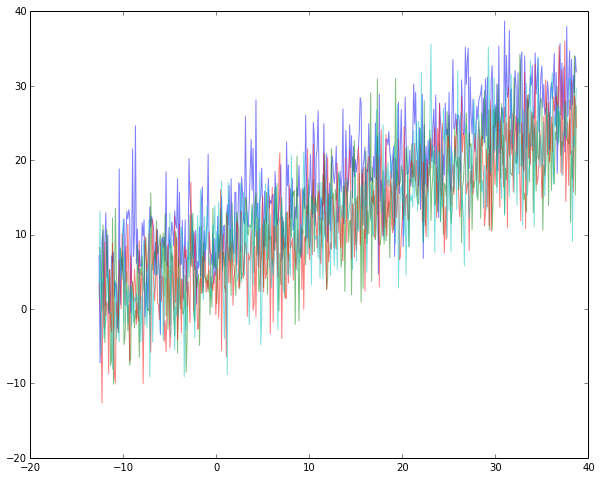

In [301]:
X = np.matrix(np.genfromtxt('W06_026_2.csv', delimiter=','))
t = np.linspace(X.min(), X.max(), 500)
plt.figure(figsize=(10, 8))

plt.plot(t, X[:,0], alpha=0.5)
plt.plot(t, X[:,1], alpha=0.5)
plt.plot(t, X[:,2], alpha=0.5)
plt.plot(t, X[:,3], alpha=0.5)


def isequalfloats(a, b, ztol = 1.0e-8):
    return True if  abs(a-b) < ztol else False

def friedman(G, alpha = 0.05, ignoreties = False, onetailed = True):
    nclasses = len(G)
    nblocks  = len(G[0])
    Rank     = [0]* nclasses              
 
    for j in range(nblocks):
        row = []
        for i in xrange(nclasses):
            row.append((G[i][j], i))
        row.sort()
        start  = 0
        while start < nclasses:
           end = start
           for k in range(start+1, nclasses):
               if not isequalfloats(row[k-1][0], row[k][0]):
                  end = k-1
                  break
           if end > start:
              rank = (start + end)/2.0 + 1
           else:
              rank = start + 1
 
           for k in range(start, end+1):
               index = row[k][1]     
               Rank[index] += rank
           start = end + 1
 
    sumRankssqr = sum([rank * rank for rank in Rank])
    Friedman = 12.0/(nblocks * nclasses*(nclasses+1))*sumRankssqr-3*(nclasses +1) *nblocks
    df = nclasses -1 
    print "T =", Friedman
    print "pvalue =", st.chi2.sf(Friedman, df)

    
friedman(X.tolist(), alpha = 0.05, ignoreties = False, onetailed = True)

Так как $pvalue < \alpha$,  то отвергаем гипотезу $H_0: \beta = \beta_2 = \dots = \beta_k$

5) Найти корреляцию между гауссовскими выборками в файле W06_026_3.csv

Выберем уровень значимости гипотезы $\alpha = 0.05$

In [302]:
import numpy as np
import scipy.stats as st

def genCorrCoef(cX, cY):
    n = cX.shape[0]
    numerator = 0.
    denom1 = 0.
    denom2 = 0.
    for j in xrange(n):
        i = 0
        while i < j:
            numerator += cX[i, j] * cY[i, j]
            denom1 += (cX[i, j])**2 
            denom2 += (cY[i, j])**2
            i += 1
    return numerator / (denom1 * denom2)**(1./2)

def pearson(X, Y):
    n = X.shape[0]
    cX = np.matrix(np.zeros((n, n)))
    cY = np.matrix(np.zeros((n, n)))
    for i in xrange(n):
        j = 0
        while j < i:
            cX[i, j] = X[j] - X[i]
            cX[j, i] = -cX[i, j]
            cY[i, j] = Y[j] - Y[i]
            cY[j, i] = -cY[i, j]
            j += 1
    r = genCorrCoef(cX, cY)
    pval = 2. * (1. - st.t(n-2.).cdf(np.abs(r * np.sqrt(n-2.) / np.sqrt(1 - r*r))))
    print 'r =', r
    print 'pvalue =', pval

def kendall(X, Y):
    n = X.shape[0]
    cX = np.matrix(np.zeros((n, n)))
    cY = np.matrix(np.zeros((n, n)))
    rX = st.rankdata(X)
    rY = st.rankdata(Y)
    for i in xrange(n):
        j = 0
        while j < i:
            cX[i, j] = np.sign(rX[j] - rX[i])
            cX[j, i] = -cX[i, j]
            cY[i, j] = np.sign(rY[j] - rY[i])
            cY[j, i] = -cY[i, j]
            j += 1
    tau = genCorrCoef(cX, cY)
    Dtau = 2. * (2.*n + 5.) / (9.*n * (n - 1.))
    norm = st.norm(loc=0., scale=1.)
    pval = 2. * (1. - norm.cdf(np.abs(tau / np.sqrt(Dtau))))
    print 'T = ',tau
    print 'pvalue = ', pval
    
def spearman(X, Y):
    n = X.shape[0]
    cX = np.matrix(np.zeros((n, n)))
    cY = np.matrix(np.zeros((n, n)))
    rX = st.rankdata(X)
    rY = st.rankdata(Y)
    for i in xrange(n):
        j = 0
        while j < i:
            cX[i, j] = rX[j] - rX[i]
            cX[j, i] = -cX[i, j]
            cY[i, j] = rY[j] - rY[i]
            cY[j, i] = -cY[i, j]
            j += 1
    r = genCorrCoef(cX, cY)
    Dr = 1. / (n - 1.)
    norm = st.norm(loc=0., scale=1.)
    pval = 2. * (1. - norm.cdf(np.abs(r / np.sqrt(Dr))))
    print 'T = ', r
    print 'pvalue = ', pval   

(500, 2)


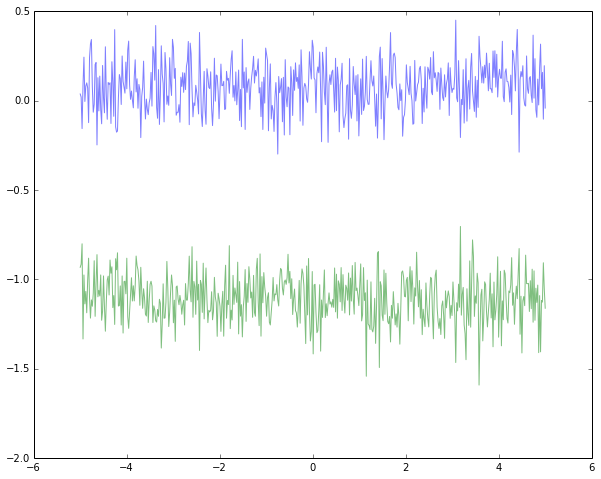

In [303]:
data = np.genfromtxt('W06_026_3.csv', delimiter=',')
print data.shape
X = data[:, 0]
Y = data[:, 1]
t = np.linspace(-5, 5, 500)
plt.figure(figsize=(10 , 8))
_=plt.plot(t, X, alpha=0.5)
_=plt.plot(t, Y, alpha=0.5)

In [304]:
kendall(X, Y)

T =  -0.185955911824
pvalue =  5.11968245576e-10


In [305]:
spearman(X, Y)

T =  -0.274624746499
pvalue =  8.53457304828e-10


In [306]:
pearson(X, Y)

r = -0.324219349738
pvalue = 1.05915276549e-13


Отвергаем гипотезу о независимости

6) Найти корреляцию между негауссовскими выборками в файле W06_026_4.csv.

Выберем уровень значимости гипотезы $\alpha = 0.05$

(500, 2)


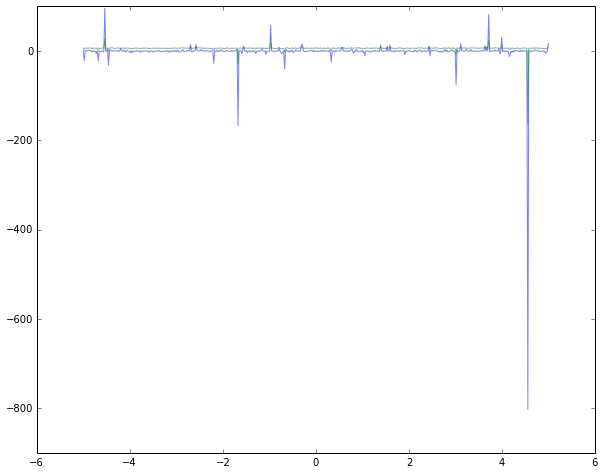

In [307]:
data = np.genfromtxt('W06_026_4.csv', delimiter=',')
print data.shape
X = data[:, 0]
Y = data[:, 1]
t = np.linspace(-5, 5, 500)
plt.figure(figsize=(10 , 8))
_=plt.plot(t, X, alpha=0.5)
_=plt.plot(t, Y, alpha=0.5)

In [308]:
kendall(X, Y)

T =  0.433651302605
pvalue =  0.0


In [309]:
spearman(X, Y)

T =  0.58946251785
pvalue =  0.0


Отвергаем гипотезу о независимости. 

7) Найти корреляцию между дискретными выборками в файле W06_026_5.csv.

Выберем уровень значимости гипотезы $\alpha = 0.05$

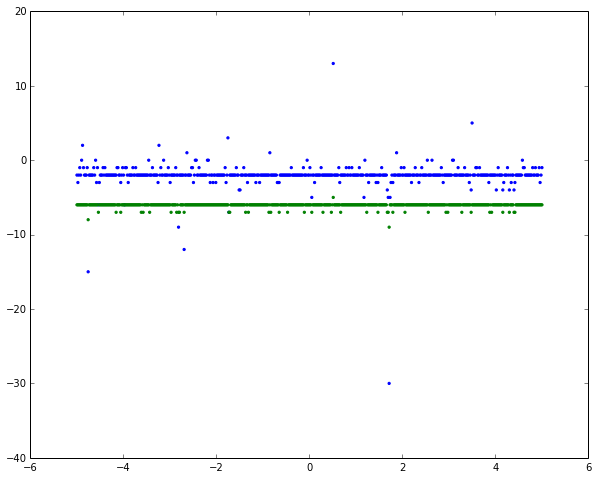

In [310]:
data = np.genfromtxt('W06_026_5.csv', delimiter=',')
X = data[:, 0]
Y = data[:, 1]
t = np.linspace(-5, 5, 500)
plt.figure(figsize=(10 , 8))
_=plt.scatter(t, X, marker='.', color='b')
_=plt.scatter(t, Y, marker='.', color='g')

In [311]:
kendall(X, Y)

T =  0.288662218976
pvalue =  0.0


Отвергаем гипотезу о независимости